# Conformers of nerve agents of V-series

## Generation of conformers for docking in Rosetta

In [1]:
# remember to source before using RDkit
# source activate my-rdkit-env 
# and open jupyter from this environment

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms as rdmt
import numpy as np
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Geometry import rdGeometry as geom
import os

In [3]:
import VXconformers
vxc = VXconformers.VXconformers()

## SMILES of the 3 nerve agents:

* VX 

(CCOP(C)(=O)SCC\[NH+\](C(C)C)C(C)C)
* Russian VX (RVX) 

CC\[NH+\](CC)CCSP(=O)(C)OCC(C)C
* Chinese VX (CVX) 

O=P(OCCCC)(SCC\[NH+\](CC)CC)C

### SMILES taken from pubchem except CVX build from RVX

In [4]:
# SMILES from pubchem except CVX build from RVX
nerve_agents = {'RVX' : 'CC[NH+](CC)CCSP(=O)(C)OCC(C)C',
                'VX'  : 'CCOP(C)(=O)SCC[NH+](C(C)C)C(C)C',
                'CVX' : 'O=P(OCCCC)(SCC[NH+](CC)CC)C'}

In [5]:
mols = {}
for name in nerve_agents.keys():
    mols[name] = vxc.generate_molecule(name,nerve_agents[name])

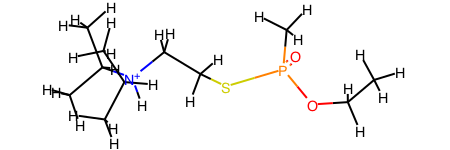

In [6]:
mols['VX']

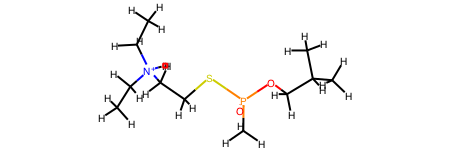

In [7]:
mols['RVX']

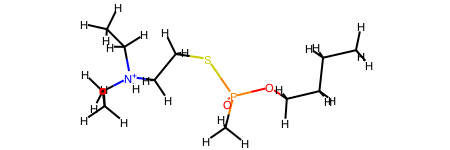

In [8]:
mols['CVX']

# Generation of nucleophile OH-

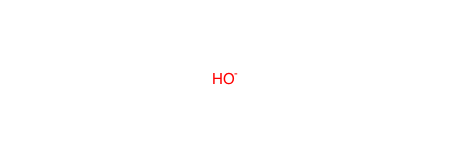

In [9]:
oh = '[OH-]'
oh = Chem.MolFromSmiles(oh,sanitize=True)
oh.SetProp("_Name","OH-")
AllChem.EmbedMolecule(oh, AllChem.ETKDG())
DrawingOptions.includeAtomNumbers=True
oh

## Setting parameters for the transition state model
### Distance, angles etc

# Add OH- to transition state model

OH_INDEX_OXYGEN = 0
OH_INDEX_HYDROGEN = 0

In [10]:
#Main of script

# angle of attacking hydrogen
ANGLE_HYDROGEN = 112
# P-S bond distance
p_s_dist = 2.36
# Number of conformers
nr_confs = 500
# RMSD between the generated conformers
rmsd_cutoff = 0.1
# setup generation of conformers
for molecule in mols.keys():
    # Name of ligand
    LIGAND_NAME = molecule
    # Generate conformers for each molecule
    cids = vxc.get_conformers(mols[molecule], nr_confs, rmsd_cutoff)
    # Get index of atoms used to build molecule
    p_id, s_id, pc_id, nh_id, po_id, poe_id = vxc.get_index_atms( mols[molecule] )
    
    ### TEST TEST ###
    o_ether_idx = vxc.get_o_ether_carbon_atoms(mols[molecule],poe_id)
    
    rmslist = vxc.get_rmsd_after_minimization_conformers(mols[molecule],cids)
    # Assign chiral centers to molecule
    Chem.FindMolChiralCenters(mols[molecule], p_id, includeUnassigned=True)
    # Remove conformers based on N-H ... P=O distance
    vxc.prune_conformers(mols[molecule],cids)
    #
    s_isomers, r_isomers = vxc.get_transition_state_geometry(p_s_dist)
    print "Number of conformers for S-"+str(molecule)+" : "+str(len(s_isomers))
    print "Number of conformers for R-"+str(molecule)+" : "+str(len(r_isomers))
    # write to file
    vxc.write_aligned_to_file(r_isomers,(p_id,po_id,poe_id,pc_id),molecule+"_R_aligned_isomers")
    vxc.write_aligned_to_file(s_isomers,(p_id,po_id,poe_id,pc_id),molecule+"_S_aligned_isomers")
    # Remove pruned conformers
    !rm prune*sdf
    # setup and add nucleophile to transition state model
    vxc.write_hydroxide_transition_state_model(oh, molecule, 'R',o_ether_idx)
    vxc.write_hydroxide_transition_state_model(oh, molecule, 'S',o_ether_idx)

Number of conformers for S-VX : 185
Number of conformers for R-VX : 198
:::::: <type 'list'>


ArgumentError: Python argument types in
    EditableMol.__init__(EditableMol, list)
did not match C++ signature:
    __init__(_object*, RDKit::ROMol)

rmsd cutoff = 0.25
Number of conformers for S-VX : 204
Number of conformers for R-VX : 178
Number of conformers for S-RVX : 163
Number of conformers for R-RVX : 158
Number of conformers for S-CVX : 147
Number of conformers for R-CVX : 158

# Setting the geometry of the attacking hydrogen of the hydroxide

In [ ]:
##ANGLE = 112
##set_angle_hydroxide(ANGLE)

In [ ]:
##help(Chem.MolFromMolFile)

In [ ]:
# Add dummy atoms between the P-S bond
m = Chem.MolFromMolFile("TS_model_RVX_S_aligned_isomers_139.sdf", False, False, False)

p_id, s_id = get_index_atms_hydroxide(m)
bond = m.GetBondBetweenAtoms(p_id, s_id)
print p_id,s_id
new_m = Chem.FragmentOnBonds(m, [bond.GetIdx()], addDummies=True, dummyLabels=[(1, 1)])


atom1 = new_m.GetAtomWithIdx(OH_INDEX_OXYGEN)
atom1.SetFormalCharge(0)

# Chem.SanitizeMol(new_m)

#writer3 = Chem.SDWriter('out_long_2.sdf')
#writer3.write(new_m,confId=0)
#rdmt.SetAngleDeg(new_m.GetConformer(0),8,43,44,90)

writer3 = Chem.SDWriter('out_long_2.sdf')
writer3.write(new_m,confId=0)



